# opencvでガボールフィルタ（python）
[参照文献](https://cppx.hatenablog.com/entry/2017/12/02/170204)

lambd = 周波数

theata = 回転

を表している

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

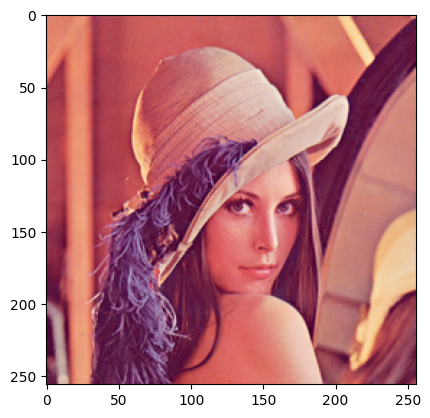

In [2]:
img = cv2.imread("SIDBA/Lenna.bmp")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
ksize = (18, 18)
sigma = 4.0
theta = np.radians(0)
lambd = 5
gamma = 0.5
psi = 0

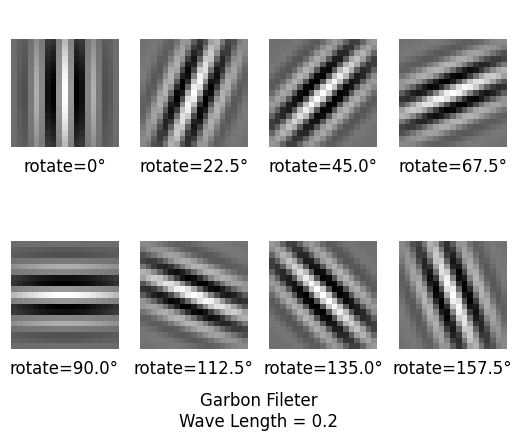

In [4]:
title = "Garbon Fileter\nWave Length = " + str(1/lambd)

fig = plt.figure()

plt.title(title, y = -0.15)
plt.axis("off")
deg = 0
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.axis("off")
    ax.set_title("rotate=" + str(deg) + "°", y=-0.3)
    theta = np.radians(deg)
    gabor = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi)
    plt.imshow(gabor, cmap="gray")
    
    deg += 180/8
plt.savefig(title.replace("\n", "").replace(" ", "") + ".jpg")
plt.show()

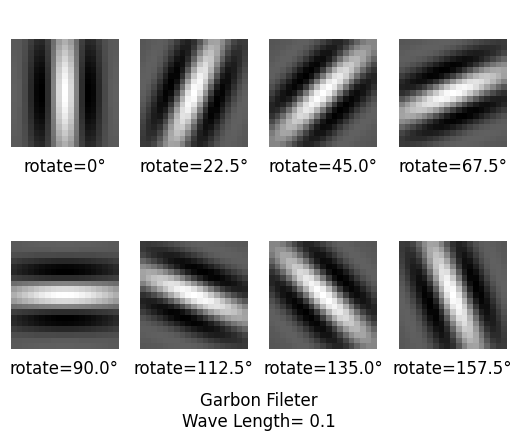

In [5]:
lambd = 5*2

title = "Garbon Fileter\nWave Length= " + str(1/lambd)

fig = plt.figure()
plt.title(title, y = -0.15)
plt.axis("off")
deg = 0
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.axis("off")
    ax.set_title("rotate=" + str(deg) + "°", y=-0.3)
    theta = np.radians(deg)
    gabor = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi)
    plt.imshow(gabor, cmap="gray")
    
    deg += 180/8

plt.savefig(title.replace("\n", "").replace(" ", "") + ".jpg")
plt.show()

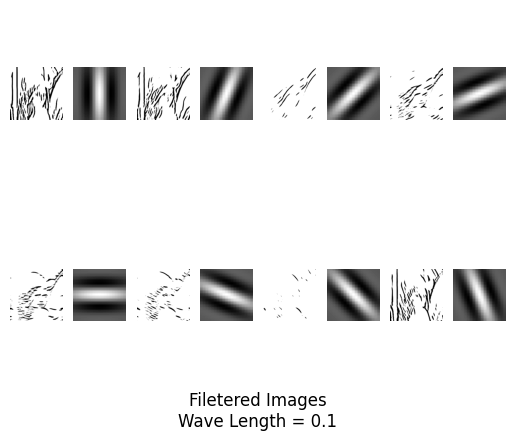

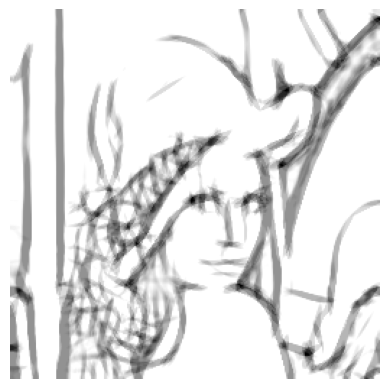

In [6]:
lambd = 5*2
title = "Filetered Images\nWave Length = " + str(1/lambd)

fig = plt.figure()
plt.title(title, y = -0.15)
plt.axis("off")
filter_sum = np.zeros(img_gray.shape)
deg = 0
for i in range(8):
    ax = fig.add_subplot(2, 8, 2*i+1)
    ax.axis("off")
    # ax.set_title("rotate=" + str(deg) + "°", y=-0.4)
    theta = np.radians(deg)
    gabor = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi)
    dst = cv2.filter2D(img_gray, -1, gabor)
    filter_sum += dst
    plt.imshow(dst, cmap="gray")
    
    
    ax = fig.add_subplot(2, 8, 2*i+2)
    ax.axis("off")
    plt.imshow(gabor, cmap="gray")
    deg += 180/8
plt.savefig(title.replace("\n", "").replace(" ", "") + ".jpg")
plt.show()
plt.imshow(filter_sum, cmap="gray")
plt.axis("off")
plt.savefig("FileteredSumWaveLength=" + str(1/lambd) + ".png")
plt.show()